In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/balanced.csv')

column_name = 'followers'

min_value = df[column_name].min()
max_value = df[column_name].max()

print(f"Minimum value in '{column_name}': {min_value}")
print(f"Maximum value in '{column_name}': {max_value}")


Minimum value in 'followers': 0
Maximum value in 'followers': 27


removing non conpiracy rows

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/overlapping_data.csv'
df = pd.read_csv(file_path)

df_filtered = df[df['label'] != 'non conspiracy']

output_file_path = 'overlapping_data_filtered.csv'

df_filtered.to_csv(output_file_path, index=False)

print(f"Filtered data saved to {output_file_path}")


Filtered data saved to overlapping_data_filtered.csv


In [ ]:
import pandas as pd

file_path = 'overlapping_data_filtered.csv'

df = pd.read_csv(file_path)

df_filtered = df[df['label'] != 'non conspiracy']

df_filtered = df_filtered.drop_duplicates(subset='user id').reset_index(drop=True)

output_file_path = 'overlapping_data_filtered1.csv'

df_filtered.to_csv(output_file_path, index=False)

print(f"Filtered data (no duplicate user ids) saved to {output_file_path}")


In [ ]:
import csv

input_txt_file = '/content/drive/MyDrive/edgescombined.txt'
output_csv_file = '/content/drive/MyDrive/edgescombined.csv'

with open(input_txt_file, 'r') as txt_file, open(output_csv_file, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)

    for line in txt_file:
        line = line.strip()
        if line:
            source, target = line.split()
            csv_writer.writerow([source, target])
print(f"Text file '{input_txt_file}' converted to CSV file '{output_csv_file}'.")


Text file '/content/drive/MyDrive/edgescombined.txt' converted to CSV file '/content/drive/MyDrive/edgescombined.csv'.


Combine edges.txt

In [ ]:
import os
parent_folder = '/content/drive/MyDrive/EdgesCombined'

combined_text = []

for subfolder_name in os.listdir(parent_folder):
    subfolder_path = os.path.join(parent_folder, subfolder_name)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if filename.endswith(".txt"):
                file_path = os.path.join(subfolder_path, filename)
                with open(file_path, 'r') as file:
                    text = file.read()
                    combined_text.append(text)

combined_text = '\n'.join(combined_text)

output_file_path = '/content/drive/MyDrive/edgescombined.txt'
with open(output_file_path, 'w') as output_file:
    output_file.write(combined_text)

print("Combined text has been saved to:", output_file_path)

Combined text has been saved to: /content/drive/MyDrive/edgescombined.txt


Elbow algorithm to find no of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

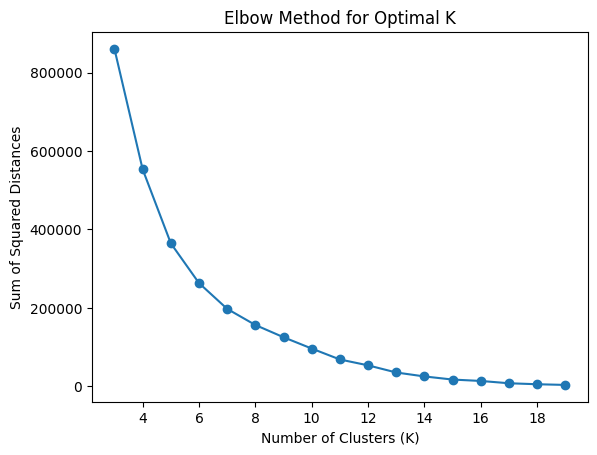

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('/content/drive/My Drive/balanced.csv')

friends_data = data[['followers']]

k_values = range(3,20)

inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(friends_data)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()


Clustering K means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


IDs and Labels of Overlapping Nodes:
               id  label
1       152907509     5G
6        18053185     5G
12      133102187     5G
16      298849039     5G
19       57652010     5G
...           ...    ...
471424   97522278  other
471425   58056504  other
471429   57650710  other
471430   45515348  other
471434  175540859  other

[201613 rows x 2 columns]
Number of Overlapping Nodes: 201613


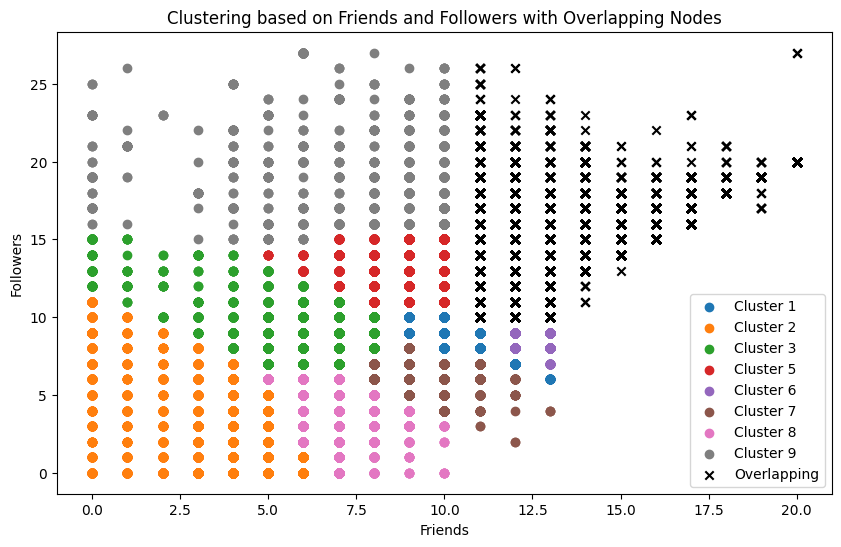

Overlapping data saved to '/content/drive/My Drive/overlapping_data.csv'.


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/My Drive/balanced.csv')

features = data[['friends', 'followers']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

k = 10

kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_features)

data['cluster'] = kmeans.labels_

overlapping_nodes = data[(data['friends'] > data['friends'].mean()) & (data['followers'] > data['followers'].mean())]

print("IDs and Labels of Overlapping Nodes:")
print(overlapping_nodes[['id', 'label']])

num_overlapping_nodes = len(overlapping_nodes)
print(f"Number of Overlapping Nodes: {num_overlapping_nodes}")

data.loc[data.index.isin(overlapping_nodes.index), 'cluster'] = 'overlapping'

plt.figure(figsize=(10, 6))
for cluster_label, cluster_data in data.groupby('cluster'):
    if cluster_label != 'overlapping':
        plt.scatter(cluster_data['friends'], cluster_data['followers'], label=f'Cluster {cluster_label}')
    else:
        plt.scatter(cluster_data['friends'], cluster_data['followers'], label='Overlapping', marker='x', c='black')
plt.xlabel('Friends')
plt.ylabel('Followers')
plt.title('Clustering based on Friends and Followers with Overlapping Nodes')
plt.legend()
plt.show()
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

output_file_path = '/content/drive/My Drive/overlapping_data.csv'

overlapping_nodes.to_csv(output_file_path, index=False)

print(f"Overlapping data saved to '{output_file_path}'.")



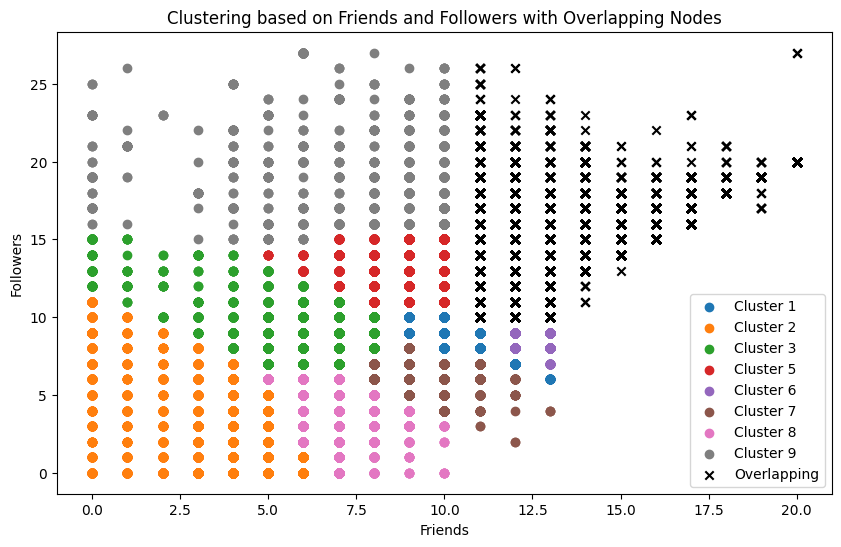

Overlapping data saved to '/content/drive/My Drive/overlapping_data.csv'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for cluster_label, cluster_data in data.groupby('cluster'):
    if cluster_label != 'overlapping':
        plt.scatter(cluster_data['friends'], cluster_data['followers'], label=f'Cluster {cluster_label}')
    else:
        plt.scatter(cluster_data['friends'], cluster_data['followers'], label='Overlapping', marker='x', c='black')
plt.xlabel('Friends')
plt.ylabel('Followers')
plt.title('Clustering based on Friends and Followers with Overlapping Nodes')
plt.legend()
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.show()

output_file_path = '/content/drive/My Drive/overlapping_data.csv'

print(f"Overlapping data saved to '{output_file_path}'.")


In [ ]:
import pandas as pd
import networkx as nx

edge_data = pd.read_csv('/content/drive/MyDrive/edgescombined.csv', header=None, names=['source', 'target'])

G = nx.DiGraph()

for _, row in edge_data.iterrows():
    source, target = row['source'], row['target']
    G.add_edge(source, target)

degree_centrality = nx.degree_centrality(G)

most_connected_node = max(degree_centrality, key=degree_centrality.get)

print(f"The most connected user ID is: {most_connected_node}")


The most connected user ID is: 127166025


In [ ]:
import pandas as pd

overlapping_data = pd.read_csv('/content/drive/MyDrive/overlapping_data.csv')

most_connected_node = '5G'

if most_connected_node in overlapping_data['id'].values:
    print(f"The most connected user ID ({most_connected_node}) is in the overlapping data.")
else:
    print(f"The most connected user ID ({most_connected_node}) is not in the overlapping data.")


The most connected user ID (5G) is not in the overlapping data.


<ipython-input-11-c76fa57d4f1e>:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if most_connected_node in overlapping_data['id'].values:


In [ ]:
import pandas as pd

overlapping_data = pd.read_csv('/content/drive/MyDrive/overlapping_data.csv')

edge_connections_data = pd.read_csv('/content/drive/MyDrive/edgescombined.csv', header=None)

overlapping_user_ids = set(overlapping_data['id'])

users_with_connections = []

for _, row in edge_connections_data.iterrows():
    user1, user2 = row[0], row[1]
    if user1 in overlapping_user_ids or user2 in overlapping_user_ids:
        users_with_connections.append(user1)
        users_with_connections.append(user2)

users_with_connections = list(set(users_with_connections))

users_with_connections_df = pd.DataFrame({'user_id': users_with_connections})

users_with_connections_df.to_csv('/content/drive/MyDrive/users_with_connections.csv', index=False)

print(f"User IDs with connections saved to 'users_with_connections.csv'.")


User IDs with connections saved to 'users_with_connections.csv'.


In [ ]:
import pandas as pd

overlapping_data = pd.read_csv('/content/drive/MyDrive/overlapping_data.csv')

edge_connections_data = pd.read_csv('/content/drive/MyDrive/edgescombined.csv', header=None)

overlapping_user_ids = set(overlapping_data['id'])

users_with_connections_df = pd.DataFrame(columns=edge_connections_data.columns)

for _, row in edge_connections_data.iterrows():
    user1, user2 = row[0], row[1]
    if user1 in overlapping_user_ids or user2 in overlapping_user_ids:
        users_with_connections_df = users_with_connections_df.append(pd.Series(row, index=users_with_connections_df.columns), ignore_index=True)

users_with_connections_df.to_csv('/content/drive/MyDrive/users_with_connections.csv', index=False)

print(f"User IDs with connections saved to 'users_with_connections1.csv'.")


<ipython-input-17-5d45575c9b97>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  users_with_connections_df = users_with_connections_df.append(pd.Series(row, index=users_with_connections_df.columns), ignore_index=True)


User IDs with connections saved to 'users_with_connections1.csv'.


In [ ]:
import pandas as pd

overlapping_data = pd.read_csv('/content/drive/MyDrive/overlapping_data.csv')

edge_connections_data = pd.read_csv('/content/drive/MyDrive/edgescombined.csv', header=None)

overlapping_user_ids = set(overlapping_data['id'])

users_with_connections_df = edge_connections_data[
    (edge_connections_data[0].isin(overlapping_user_ids)) | (edge_connections_data[1].isin(overlapping_user_ids))
]

users_with_connections_df.to_csv('/content/drive/MyDrive/users_with_connections.csv', header=False, index=False)

print(f"User IDs with connections saved to 'users_with_connections.csv'.")


User IDs with connections saved to 'users_with_connections.csv'.


In [ ]:
import pandas as pd

overlapping_data = pd.read_csv('/content/drive/MyDrive/overlapping_data.csv')

edge_connections_data = pd.read_csv('/content/drive/MyDrive/edgescombined.csv', header=None)

overlapping_user_ids = set(overlapping_data['id'])

users_with_connections_df = edge_connections_data[
    (edge_connections_data[0].isin(overlapping_user_ids))
]

users_with_connections_df.to_csv('/content/drive/MyDrive/users_with_connections1.csv', header=False, index=False)

print(f"User IDs with connections saved to 'users_with_connections1.csv'.")


User IDs with connections saved to 'users_with_connections1.csv'.


In [ ]:
import pandas as pd

overlapping_data = pd.read_csv('/content/drive/MyDrive/overlapping_data.csv')

edgescombined_data = pd.read_csv('/content/drive/MyDrive/edgescombined.csv', header=None)

user_ids = overlapping_data['id']
user_labels = overlapping_data['label']

user_label_dict = dict(zip(user_ids, user_labels))

user_connection_count = {user_id: 0 for user_id in user_ids}

for _, row in edgescombined_data.iterrows():
    source, target = row[0], row[1]
    if source in user_connection_count:
        user_connection_count[source] += 1
    if target in user_connection_count:
        user_connection_count[target] += 1

user_connections_df = pd.DataFrame({
    'user_id': user_ids,
    'label': [user_label_dict[user_id] for user_id in user_ids],
    'connection_count': [user_connection_count[user_id] for user_id in user_ids]
})

user_connections_df.to_csv('/content/drive/MyDrive/user_connections.csv', index=False)

print("User IDs, labels, and connection counts saved to 'user_connections.csv'.")


User IDs, labels, and connection counts saved to 'user_connections.csv'.
